<a href="https://colab.research.google.com/github/ydieh/Deteccion-de-basura/blob/main/TRANFER_LEARNING_DETECCI%C3%93N_DE_DESECHOS_SOLIDOS_EN_FUENTES_DE_AGUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DETECCIÓN DE DESECHOS SOLIDOS EN FUENTES DE AGUA CON TRANFER LEARNING**


In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
%cd yolov5
%pip install wandb -qr requirements.txt # install requirements.txt


# **Instalar dependencias**



In [ ]:
# Clonamos el repositorio YOLOv5 
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
# Instalamos las dependencias necesarias
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


Setup complete ✅ (12 CPUs, 83.5 GB RAM, 25.8/166.8 GB disk)


In [ ]:
#Importamos la libreria python.display para mostrar imágenes
from IPython.display import Image, clear_output

# **Subir el datasets de roboflow a colab**


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jDStiVlHOtm6ZIiOzRPp")
project = rf.workspace("alejandra").project("desechos-xkeu9")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=1604facff245a3a3cbc2e1cdae30339b2cc0fae2ed7cb612eff6e61051e62fe0
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to desechos-2 in yolov5pytorch:: 100%|██████████| 12890/12890 [00:02<00:00, 6233.56it/s]


In [ ]:
!pip install torch==1.10.1 torchvision==0.11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.10.1 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.10.1 which is incompatible.


In [ ]:
#Ponemos en formato yolov5  el dataset para el entrenamiento
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=roboflow-yolov5


In [ ]:
#Verificamos si el modelo yolov5 se cargo correctamente
%cd /content/yolov5

/content/yolov5


In [ ]:
#Este es el archivo YAML que Roboflow escribió para el dataset que estamos usando
%cat {dataset.location}/data.yaml
#Mostrara las etiquetas que tiene el dataset

names:
- Bolsa
- Botella
- Plato
- Red de pesca
- Vaso
nc: 5
roboflow:
  license: CC BY 4.0
  project: desechos-xkeu9
  url: https://universe.roboflow.com/alejandra/desechos-xkeu9/dataset/2
  version: 2
  workspace: alejandra
test: ../test/images
train: desechos-2/train/images
val: desechos-2/valid/images


In [ ]:
#Importar librerias openCV, matplotlib
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
#Identificacion de los archivos de imagen
dirCarpeta = '/content/yolov5/desechos-2/test/images'
archivos = os.listdir(dirCarpeta)

Exploramos el datasets

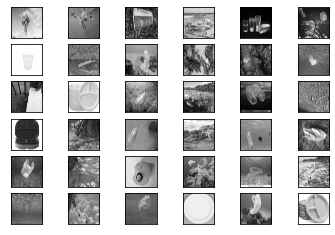

In [ ]:
#Arreglos vacios
img_array = []
titulos_array = []
#Hacemos un for para leer las imagenes de entrenamiento
for x in range(0,36):
    #obtenemos la ruta de las imagenes de entrenamiento
    dirArchivo = dirCarpeta +'/'+archivos[x]
    #Cargar la imagen con openCV
    imgBGR = cv2.imread(dirArchivo)
    #Cambiar esacio de color BGR a RGB
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    #Arreglo con la informacion de las imagenes leidas
    img_array.append(imgRGB)
    #Extraer el nombre de la imagen sin la extension
    img_ext = archivos[x]
    nomImagen = img_ext[:-4]
    #Nombres de imagenes ser[an un arreglo de titulos
    titulos_array.append(nomImagen)
    #Establecer filas y comulnas de la figura
    plt.subplot(6,6,x+1)
    #Ocultar valores numericos de los ejes
    plt.xticks([])
    plt.yticks([])
    #Identifica que imagen mostrar
    plt.imshow(img_array[x])
#Mostrar imagen
plt.show()

# **Definimos el Modelo**
1.   Definir la configuración y la arquitectura del modelo
2.   Escribiremos un script yaml que defina los parámetros de nuestro modelo, como el número de clases, anclas y cada capa.

Para entrenar el YOLOv5 hay 4 versiones.
*   yolov5-s que es una versión pequeña
*   yolov5-m que es una versión mediana
*   yolov5-l que es una versión grande
*   yolov5-x que es una versión extra grande

Aqui utilizaremos la version de yolov5-s y congelaremos las capas de yolov5s




In [ ]:
#Definimos el número de clases basado en YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#Esta es la configuración del modelo que usaremos es version pequeña de yolov5 
%cat /content/yolov5/desechos-2/data.yaml

names:
- Bolsa
- Botella
- Plato
- Red de pesca
- Vaso
nc: 5
roboflow:
  license: CC BY 4.0
  project: desechos-xkeu9
  url: https://universe.roboflow.com/alejandra/desechos-xkeu9/dataset/2
  version: 2
  workspace: alejandra
test: ../test/images
train: desechos-2/train/images
val: desechos-2/valid/images


In [ ]:
#Personalizar el archivo de escritura de iPython para que podamos escribir variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
#Personalizamos el archivo yaml con la version pequeña
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# **Entrenamos el modelo**
Para entrenar el modelo tenemos que pasarle una serie de parametros el parametro mas importante para entrenarlo con transfer learning  es freeze que congela las capas en esta caso se congelaran 10 capas de la red neuronal, tambien se puede congelar todas las capas.
### **Parametros**

*   img: define el tamaño de la imagen de entrada
*   lote: determinar el tamaño del lote
*   épocas: define el número de épocas de entrenamiento. (Nota: ¡a menudo, más de 3000 son comunes aquí!)
*   datos: establezca la ruta a nuestro archivo yaml
*   freeze


In [ ]:
#Instalamos wandb WandB para hacer el seguimiento de sus hiperparámetros, 
#métricas del sistema y predicciones 
#para que pueda comparar modelos en vivo y compartir sus hallazgos.
%pip install -q wandb
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.9 MB/s eta 0:00:00


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!python /content/yolov5/train.py --img 416 --batch 16  --epochs 100 --data /content/yolov5/desechos-2/data.yaml --weights yolov5s.pt --freeze 15

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: ydieh. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/desechos-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[15], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.10.1+cu102 CUDA:0 (NVIDIA A10

### **Evaluamos el como le fue al entrenamiento**
Para comprender mejor los resultados, resumamos las pérdidas y las métricas de YOLOv5. La función de pérdida de YOLO se compone de tres partes:

1.   box_loss — pérdida de regresión del cuadro delimitador (error cuadrático medio).
2.   obj_loss — la confianza de la presencia del objeto es la pérdida de objetividad 
3. cls_loss — the classification loss (Cross Entropy)

La precisión mide cuánto de las predicciones de bbox son correctas (Verdaderos positivos / (Verdaderos positivos + Falsos positivos)), y Recall mide cuánto de los verdaderos bbox se predijeron correctamente (Verdaderos positivos / (Verdaderos positivos + Falsos negativos)). 'mAP_0.5' es la precisión media media ( mAP ) en el umbral IoU (intersección sobre unión) de 0,5. 'mAP_0.5:0.95' es el promedio de mAP sobre diferentes umbrales de IoU, que van de 0,5 a 0,95.

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp2/results.png', width=1000)  # view results.png

### **Matrix de Confusion**

In [ ]:

Image(filename='/content/yolov5/runs/train/exp2/confusion_matrix.png', width=900)

### **Curva de Presicion**

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/P_curve.png', width=900)

### **Curva de Recall**

mide cuánto de los verdaderos bbox se predijeron correctamente (Verdaderos positivos / (Verdaderos positivos + Falsos negativos)).

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/R_curve.png', width=900)

### **Probamos el modelo con los datos de test**

In [ ]:
# Mostramos un ejemplo con datos de entrenamiento
Image(filename='/content/yolov5/runs/train/exp2/val_batch1_labels.jpg', width=900)

In [ ]:
# Mostramos un ejemplo con la prediccion de la imagen anterior
Image(filename='/content/yolov5/runs/train/exp2/val_batch1_pred.jpg', width=900)

In [ ]:
# Mostramos un ejemplo de entrenamiento con datos de aumentados
Image(filename='/content/yolov5/runs/train/exp2/train_batch2.jpg', width=900)

### *Probamos el modelo*


In [ ]:
#Probamos el modelo con una imagen de Test 

In [ ]:
#Mostramos la imagen con la prediccion
Image(filename='/content/yolov5/runs/train/exp2/img_test2.jpg', width=500)

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --img 416 --conf 0.1 --source '/content/yolov5/runs/train/exp2/img_test2.jpg'

In [ ]:
#Mostramos la imagen con la prediccion
Image(filename='/content/yolov5/runs/detect/exp/img_test2.jpg', width=500)

In [ ]:
#Mostramos la imagen con la prediccion
Image(filename='/content/yolov5/runs/train/exp2/img_test1.jpg', width=500)

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --img 416 --conf 0.1 --source '/content/yolov5/runs/train/exp2/img_test1.jpg'

In [ ]:
#Mostramos la imagen con la prediccion
Image(filename='/content/yolov5/runs/detect/exp3/img_test1.jpg', width=500)

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --img 416 --conf 0.1 --source '/content/yolov5/runs/train/exp2/img_test3.jpg'

In [ ]:
#Mostramos la imagen con la prediccion
Image(filename='/content/yolov5/runs/detect/exp4/img_test3.jpg', width=500)

### Exportacion del modelo a engine, onnx, tensowflow lite

In [ ]:
!python export.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --include tflite  --img 416 

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best-fp16.tflite' --img 416 --conf 0.1 --source '/content/yolov5/runs/train/exp2/img_test2.jpg'

In [ ]:
!python export.py --weights '/content/yolov5/runs/train/exp2/weights/best-fp16.tflite' --include engine onnx --data {dataset.location}/data.yaml --device 0 --imgsz 640 640
clear_output()

In [ ]:
# Uncomment all this if you want to follow the long path
!pip install onnx>=1.7.0 # for ONNX export
!pip install coremltools==4.0 # for CoreML export
!python models/export.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 416 --batch 1 # export at 640x640 with batch size 1
 
!pip install tensorflow-addons
!pip install onnx-tf
 
import tensorflow_addons as tfa
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf
print(tf.__version__)
 

In [ ]:
!python export.py --weights '/content/yolov5/runs/train/yolov5l_results/weights/best.pt' --include tflite --data {dataset.location}/data.yaml --device 0 --imgsz 416 416
